In [1]:
#!pip install --user mlrose

In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt


In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [4]:
max_iter = np.linspace(1, 150, num = 150 , dtype = int)
max_iter

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150])

- https://towardsdatascience.com/getting-started-with-randomized-optimization-in-python-f7df46babff0
- https://mlrose.readthedocs.io/en/stable/source/fitness.html
- https://mlrose.readthedocs.io/en/stable/source/tutorial1.html#define-a-fitness-function-object

https://mlrose.readthedocs.io/en/stable/source/decay.html#decay
https://mlrose.readthedocs.io/en/stable/source/algorithms.html#algs

# Strengths of Simulated Annealing

## Set up continuos peaks

In [5]:
continuous_peaks = mlrose.ContinuousPeaks(t_pct=0.15)
continuous_peaks_state = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])
problem_continuous_peaks = mlrose.DiscreteOpt(length = len(continuous_peaks_state), fitness_fn = continuous_peaks, max_val = 2)


## Random Hill Climb 

In [6]:
random_start_time = time.time()
random_best_state, random_best_fitness = mlrose.random_hill_climb(problem_continuous_peaks, 
                                                      max_attempts = 10, max_iters = 150,
                                                      init_state = continuous_peaks_state, random_state = 2)
random_runtime = time.time() - random_start_time

random_iter_fitness = []
for i in max_iter: 
    random_best_state, random_best_fitness = mlrose.random_hill_climb(problem_continuous_peaks, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = continuous_peaks_state, random_state = 2)
    random_iter_fitness.append(random_best_fitness)
    

## Simulated Annealing

In [7]:
sa_start_time = time.time()
sa_best_state, sa_best_fitness5 = mlrose.simulated_annealing(problem_continuous_peaks, 
                                                      max_attempts = 10, max_iters = 150,
                                                      init_state = continuous_peaks_state, random_state = 2)
sa_runtime = time.time() - sa_start_time

sa_iter_fitness = []
for i in max_iter: 
    sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem_continuous_peaks, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = continuous_peaks_state, random_state = 2)
    sa_iter_fitness.append(sa_best_fitness)
    

In [8]:
sa_best_fitness5

21.0

## Genetic 

In [9]:
gen_start_time = time.time()
gen_best_state, gen_best_fitness = mlrose.genetic_alg(problem_continuous_peaks, max_attempts = 10, max_iters = 150, random_state = 2)
gen_runtime = time.time() - gen_start_time


gen_iter_fitness = []
for i in max_iter: 
    gen_best_state, gen_best_fitness = mlrose.genetic_alg(problem_continuous_peaks, 
                                                          max_attempts = 10, max_iters = int(i), 
                                                          random_state = 2)

    gen_iter_fitness.append(gen_best_fitness)
    

## MIMIC

In [10]:
mimic_start_time = time.time()
mimic_best_state, mimic_best_fitness = mlrose.mimic(problem_continuous_peaks, max_attempts = 10, max_iters = 150)
mimic_runtime = time.time() - mimic_start_time

mimic_iter_fitness = []
for i in max_iter: 
    mimic_best_state, mimic_best_fitness = mlrose.mimic(problem_continuous_peaks,
                                                        max_attempts = 10, max_iters = int(i),
                                                        random_state = 1)


    mimic_iter_fitness.append(mimic_best_fitness)

## Iteration Comparsion

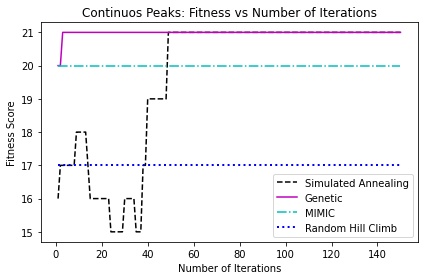

In [11]:
plt.plot(max_iter, sa_iter_fitness, '--', color="k",  label="Simulated Annealing")
plt.plot(max_iter, gen_iter_fitness, color="m",  label="Genetic")
plt.plot(max_iter, mimic_iter_fitness,linestyle = 'dashdot' , color="c",  label="MIMIC")
plt.plot(max_iter, random_iter_fitness, linestyle = 'dotted', color="b",  linewidth=2, label="Random Hill Climb")

plt.title("Continuos Peaks: Fitness vs Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Runtime Comparison

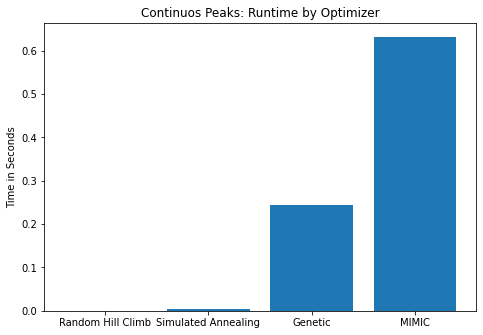

In [12]:
optimizer = ['Random Hill Climb', 'Simulated Annealing', 'Genetic', 'MIMIC']
runtime = [random_runtime, sa_runtime, gen_runtime, mimic_runtime]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(optimizer,runtime)
plt.title("Continuos Peaks: Runtime by Optimizer")
plt.ylabel("Time in Seconds") 
plt.show()


# Strengths of Genetic Algorithm


## Set up One Max Problem 

In [13]:
one_max = mlrose.OneMax()
one_max_init_state = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
problem_one_max = mlrose.DiscreteOpt(length = len(one_max_init_state), fitness_fn = one_max)


## Random Hill Climb

In [14]:
random_start_time1 = time.time()
random_best_state1, random_best_fitness1 = mlrose.random_hill_climb(problem_one_max, 
                                                      max_attempts = 10, max_iters = 150,
                                                      init_state = one_max_init_state, random_state = 2)
random_runtime1 = time.time() - random_start_time1

random_iter_fitness1 = []
for i in max_iter: 
    random_best_state1, random_best_fitness1 = mlrose.random_hill_climb(problem_one_max, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = one_max_init_state, random_state = 2)
    random_iter_fitness1.append(random_best_fitness1)
    

## Simulated Annealing

In [15]:
sa_start_time1 = time.time()
sa_best_state1, sa_best_fitness1 = mlrose.simulated_annealing(problem_one_max, 
                                                      max_attempts = 10, max_iters = 150,
                                                      init_state = one_max_init_state, random_state = 2)
sa_runtime1 = time.time() - sa_start_time1

sa_iter_fitness1 = []
for i in max_iter: 
    sa_best_state1, sa_best_fitness1 = mlrose.simulated_annealing(problem_one_max, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = one_max_init_state, random_state = 2)
    sa_iter_fitness1.append(sa_best_fitness1)
    

## Genetic Algorithm

In [16]:
gen_start_time1= time.time()
gen_best_state1, gen_best_fitness1 = mlrose.genetic_alg(problem_one_max, max_attempts = 10, max_iters = 150, random_state =2)
gen_runtime1 = time.time() - gen_start_time1


gen_iter_fitness1 = []
for i in max_iter: 
    gen_best_state1, gen_best_fitness1 = mlrose.genetic_alg(problem_one_max, max_attempts = 10, max_iters = int(i), random_state = 2)

    gen_iter_fitness1.append(gen_best_fitness1)
    

In [17]:
mlrose.genetic_alg(problem_one_max, max_attempts = 10, max_iters = 150, random_state =2, curve = True)


(array([1, 1, 1, 1, 1, 1, 1, 1, 1]),
 9.0,
 array([8., 8., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]))

## MIMIC

In [18]:
mimic_start_time1 = time.time()
mimic_best_state1, mimic_best_fitness1 = mlrose.mimic(problem_one_max, max_attempts = 10, max_iters = 150, random_state = 2)
mimic_runtime1 = time.time() - mimic_start_time1

mimic_iter_fitness1 = []
for i in max_iter: 
    mimic_best_state1, mimic_best_fitness1 = mlrose.mimic(problem_one_max, max_attempts = 10,max_iters = int(i), random_state = 2)


    mimic_iter_fitness1.append(mimic_best_fitness1)

In [19]:
mlrose.mimic(problem_one_max, max_attempts = 10,max_iters = int(i), random_state = 2, curve = True)


(array([1, 1, 1, 1, 1, 1, 1, 1, 1]),
 9.0,
 array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]))

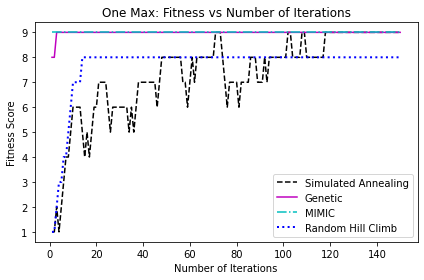

In [20]:
plt.plot(max_iter, sa_iter_fitness1, '--', color="k",  label="Simulated Annealing")
plt.plot(max_iter, gen_iter_fitness1, color="m",  label="Genetic")
plt.plot(max_iter, mimic_iter_fitness1,linestyle = 'dashdot' , color="c",  label="MIMIC")
plt.plot(max_iter, random_iter_fitness1, linestyle = 'dotted', color="b",  linewidth=2, label="Random Hill Climb")

plt.title("One Max: Fitness vs Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

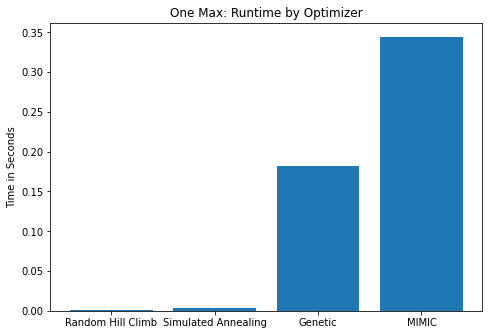

In [21]:
optimizer = ['Random Hill Climb', 'Simulated Annealing', 'Genetic', 'MIMIC']
runtime = [random_runtime1, sa_runtime1, gen_runtime1, mimic_runtime1]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(optimizer,runtime)
plt.title("One Max: Runtime by Optimizer")

plt.ylabel("Time in Seconds") 
plt.show()


# Strengths of MIMIC

## Set Up Knapsack

In [22]:
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]
max_weight_pct = 0.6
knapsack = mlrose.Knapsack(weights, values, max_weight_pct)
knapsack_init_state = np.array([1, 0, 1, 1, 0])

problem_knapsack = mlrose.DiscreteOpt(length = 5, fitness_fn = knapsack)


## Random Hill Climb

In [23]:
random_start_time2 = time.time()
random_best_state2, random_best_fitness2 = mlrose.random_hill_climb(problem_knapsack, 
                                                      max_attempts = 10, max_iters = 150,
                                                      init_state = knapsack_init_state, random_state = 2)
random_runtime2 = time.time() - random_start_time2

random_iter_fitness2 = []
for i in max_iter: 
    random_best_state2, random_best_fitness2 = mlrose.random_hill_climb(problem_knapsack, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = knapsack_init_state, random_state = 2)
    random_iter_fitness2.append(random_best_fitness2)
    

## Simulated Annealing 

In [24]:
sa_start_time2 = time.time()
sa_best_state2, sa_best_fitness2 = mlrose.simulated_annealing(problem_knapsack, 
                                                      max_attempts = 10, max_iters = 150,
                                                      init_state = knapsack_init_state, random_state = 2)
sa_runtime2 = time.time() - sa_start_time2

sa_iter_fitness2 = []
for i in max_iter: 
    sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem_knapsack, 
                                                      max_attempts = 10, max_iters = int(i),
                                                      init_state = knapsack_init_state, random_state = 2)
    sa_iter_fitness2.append(sa_best_fitness2)
    

In [25]:
sa_best_state

array([0, 1, 1, 1, 0])

## Genetic

In [26]:
gen_start_time2 = time.time()
gen_best_state2, gen_best_fitness2 = mlrose.genetic_alg(problem_knapsack, max_attempts = 10, max_iters = 150, random_state = 2)
gen_runtime2 = time.time() - gen_start_time2


gen_iter_fitness2 = []
for i in max_iter: 
    gen_best_state2, gen_best_fitness2 = mlrose.genetic_alg(problem_knapsack, max_attempts = 10, max_iters = int(i), random_state = 2)

    gen_iter_fitness2.append(gen_best_fitness2)
    

In [27]:
gen_best_state2

array([0, 1, 1, 0, 1])

## MIMIC

In [28]:
mimic_start_time2 = time.time()
mimic_best_state2, mimic_best_fitness2 = mlrose.mimic(problem_knapsack, max_attempts = 10, max_iters = 50, random_state = 2)
mimic_runtime2 = time.time() - mimic_start_time2

mimic_iter_fitness2 = []
for i in max_iter: 
    mimic_best_state2, mimic_best_fitness2 = mlrose.mimic(problem_knapsack, max_attempts = 10,max_iters = int(i), random_state = 2)


    mimic_iter_fitness2.append(mimic_best_fitness2)

In [29]:
mimic_best_state2

array([0, 1, 1, 0, 1])

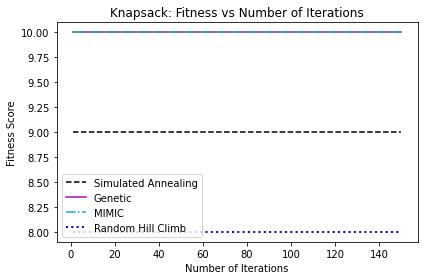

In [30]:
plt.plot(max_iter, sa_iter_fitness2, '--', color="k",  label="Simulated Annealing")
plt.plot(max_iter, gen_iter_fitness2, color="m",  label="Genetic")
plt.plot(max_iter, mimic_iter_fitness2,linestyle = 'dashdot' , color="c",  label="MIMIC")
plt.plot(max_iter, random_iter_fitness2, linestyle = 'dotted', color="b",  linewidth=2, label="Random Hill Climb")

plt.title("Knapsack: Fitness vs Number of Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score") 
plt.legend(loc="best")
plt.tight_layout()
plt.show()

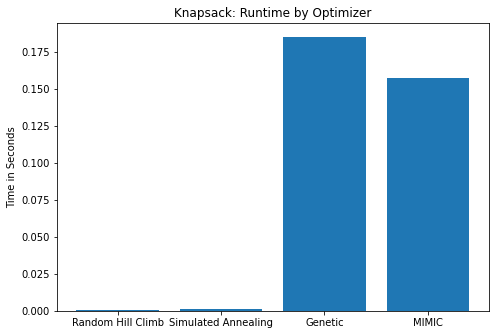

In [31]:
optimizer = ['Random Hill Climb', 'Simulated Annealing', 'Genetic', 'MIMIC']
runtime = [random_runtime2, sa_runtime2, gen_runtime2, mimic_runtime2]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(optimizer,runtime)
plt.title("Knapsack: Runtime by Optimizer")
plt.ylabel("Time in Seconds") 
plt.show()
